In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("data/TrendAwareLSTM_result_100_64.csv")

df 

,split_index,predict,true
0,57117,-3.8420045,-3.4
1,split_index,predict,true
2,57117,-3.8518775,-3.4
3,split_index,predict,true
4,57118,-3.7324274,-3.2
...,...,...,...
478,57354,0.23297513,0.6
479,split_index,predict,true
480,57355,0.19414952,-0.2
481,split_index,predict,true


In [3]:
df = df[df['true']!='true']
df['predict'] = df['predict'].astype(float)
df['true'] = df['true'].astype(float)

C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33136\1930102061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict'] = df['predict'].astype(float)
C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33136\1930102061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['true'] = df['true'].astype(float)


In [4]:
df 

,split_index,predict,true
0,57117,-3.842004,-3.4
2,57117,-3.851878,-3.4
4,57118,-3.732427,-3.2
6,57119,-3.540369,-4.4
8,57120,-3.905433,-4.0
...,...,...,...
474,57352,0.748820,-0.2
476,57353,0.477859,0.0
478,57354,0.232975,0.6
480,57355,0.194150,-0.2


<Axes: >

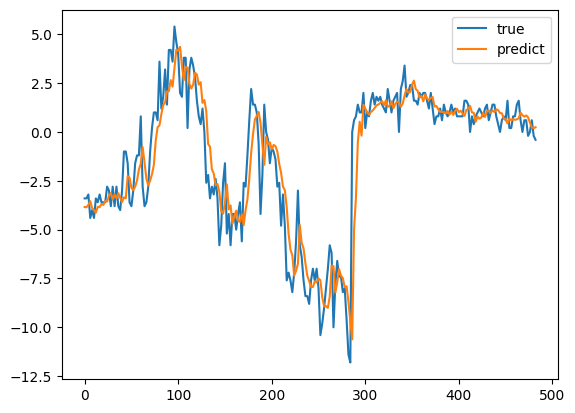

In [5]:
df[['true','predict']].plot()

In [6]:
import pandas as pd 
df_trendawarelstm = pd.DataFrame()
for file in ["./data/TrendAwareLSTM_result_100_64_56634_56875.csv","./data/TrendAwareLSTM_result_100_64_56875_57117.csv"]:
    df_tmp = pd.read_csv(file,sep=',')
    df_trendawarelstm = pd.concat([df_trendawarelstm,df_tmp])

df_trendawarelstm

df_trendawarelstm = df_trendawarelstm[df_trendawarelstm['true']!='true']
df_trendawarelstm['predict'] = df_trendawarelstm['predict'].astype(float)
df_trendawarelstm['true'] = df_trendawarelstm['true'].astype(float)

In [7]:
df_trendawarelstm = df_trendawarelstm.sort_values(by='split_index').reset_index(drop=True) 

<Axes: >

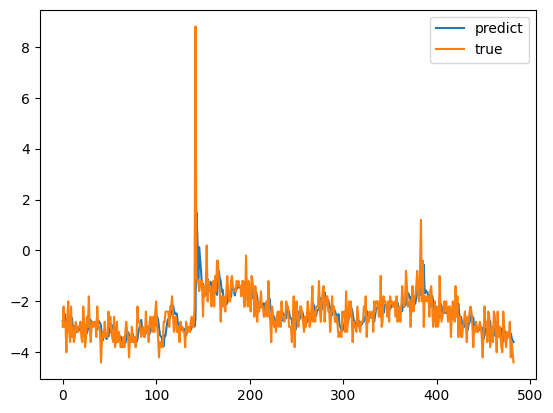

In [8]:
df_trendawarelstm[['predict','true']].plot()

In [9]:
df_trendawarelstm.to_csv('./result/df_trendawarelstm_到期日前两天.csv',sep='\t')

In [10]:
import pandas as pd 
df_fcnn = pd.DataFrame()
for file in ["./data/FCNN_result_100_64_56634_56875.csv","./data/FCNN_result_100_64_56875_57117.csv"]:
    df_tmp = pd.read_csv(file,sep=',')
    df_fcnn = pd.concat([df_fcnn,df_tmp])

df_fcnn

df_fcnn = df_fcnn[df_fcnn['true']!='true']
df_fcnn['predict'] = df_fcnn['predict'].astype(float)
df_fcnn['true'] = df_fcnn['true'].astype(float)

In [11]:
df_fcnn = df_fcnn.sort_values(by='split_index').reset_index(drop=True) 

<Axes: >

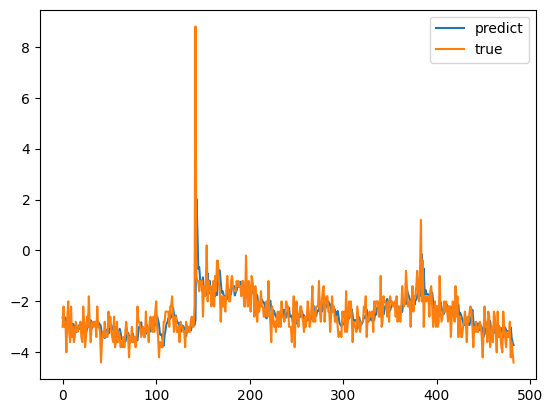

In [12]:
df_fcnn[['predict','true']].plot()

In [13]:
df_fcnn.to_csv('./result/df_fcnn_到期日前两天.csv',sep='\t')

: 

In [22]:
df_fcnn = df_fcnn.rename(columns={"predict":"fcnn_predict"})

In [23]:
df_aa = pd.merge(df_trendawarelstm,df_fcnn[['split_index','fcnn_predict']],how='left',on='split_index')

<Axes: >

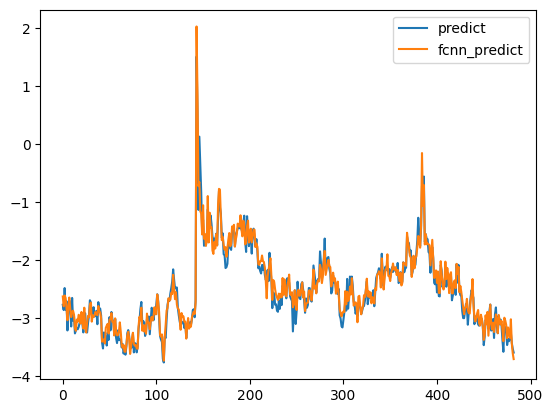

In [26]:
df_aa[['predict','fcnn_predict']].plot()

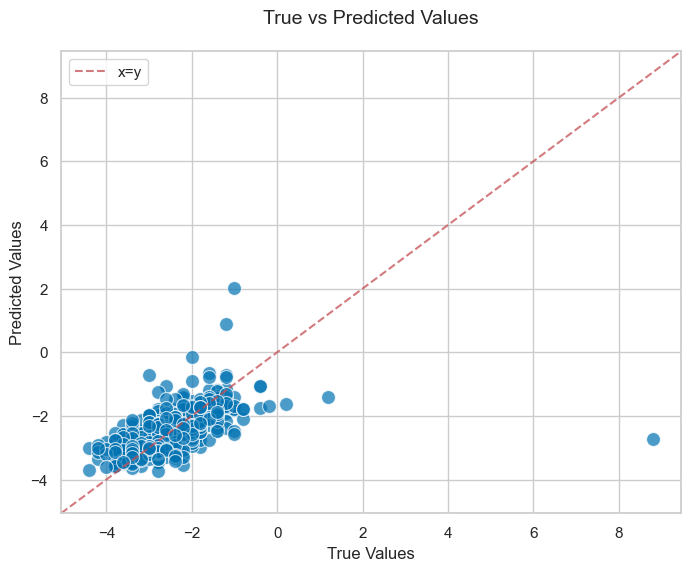

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 生成示例数据（替换为你的真实数据）
# np.random.seed(123)
# true_values = np.random.normal(loc=10, scale=2, size=50)
# predicted_values = true_values + np.random.normal(loc=0, scale=1, size=50)
# df = pd.DataFrame({"true": true_values, "predicted": predicted_values})

# 绘制散点图
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")  # 设置主题

ax = sns.scatterplot(
    data=df_fcnn, x="true", y="predict",
    color="#0072B2", s=100, alpha=0.7, edgecolor="w"
)

# 添加 y=x 参考线
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, "r--", alpha=0.75,label='x=y')
ax.set_xlim(lims)
ax.set_ylim(lims)

# 添加标题和标签
plt.title("True vs Predicted Values", fontsize=14, pad=20)
plt.xlabel("True Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()

In [37]:
# !pip3 install seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple

In [40]:
from metrics import *
import pandas as pd 
metric = Metrics()
import os 
metric.MetricsAll(df_fcnn['true'],df_fcnn['predict'])

(0.4737063422567288,
 0.793818840969264,
 0.18398211909778067,
 0.2746380018214526)

In [41]:
metric.MetricsAll(df_trendawarelstm['true'],df_trendawarelstm['predict'])

(0.4729256675983437,
 0.7917604681748861,
 0.18367891399967837,
 0.2783948530483722)

In [45]:
df = pd.read_csv('./data/df_predict_armean.csv',sep='\t')
df

,h.1,h.2,h.3,h.4,h.5,t.1,t.2,t.3,t.4,t.5
0,2.846559,2.892032,2.936444,2.979820,3.022183,2.4,2.0,1.8,1.0,1.6
1,2.453138,2.505057,2.555787,2.605354,2.653784,2.0,1.8,1.0,1.6,1.0
2,2.059410,2.117480,2.174239,2.229718,2.283944,1.8,1.0,1.6,1.0,2.2
3,1.862272,1.923155,1.982678,2.040872,2.097768,1.0,1.6,1.0,2.2,1.8
4,1.078562,1.155474,1.230770,1.304486,1.376654,1.6,1.0,2.2,1.8,1.4
...,...,...,...,...,...,...,...,...,...,...
11693,3.101526,2.886267,2.731022,2.619060,2.538313,2.6,3.0,3.0,2.2,3.4
11694,2.523998,2.469466,2.430339,2.402265,2.382121,3.0,3.0,2.2,3.4,2.6
11695,2.811777,2.677156,2.580871,2.512006,2.462752,3.0,2.2,3.4,2.6,3.4
11696,2.813982,2.680715,2.585242,2.516843,2.467842,2.2,3.4,2.6,3.4,3.0


In [46]:
df_trendawarelstm['']

,split_index,predict,true
0,56634,-2.774299,-3.0
1,56635,-2.864966,-2.2
2,56636,-2.485449,-3.0
3,56637,-2.861594,-2.8
4,56638,-2.713127,-4.0
...,...,...,...
478,57112,-3.362021,-2.8
479,57113,-3.259651,-4.2
480,57114,-3.434719,-3.6
481,57115,-3.533085,-4.0
